# Modelagem de Hiperparâmetros

In [11]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import clf_vAngra_lib as vCLF

from astropy.stats import mad_std
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


%matplotlib inline
#plt.style.use('seaborn-white')
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['axes.labelsize']   = 18
plt.rcParams['axes.titlesize']   = 18
plt.rcParams['legend.fontsize']  = 18

## Load dos Dados

In [12]:
df = pd.read_csv('../data/DataFrame_Aqst.csv',index_col=0)
df.head()

,Amp,Area,Pos_Amp,FWHM,Label
0,6.023878,56.830998,14.0,8.0,1.0
1,5.075051,-37.835989,13.0,6.0,1.0
2,5.075051,-37.945485,13.0,6.0,1.0
3,5.573990,29.943948,14.0,7.0,1.0
4,5.061862,-21.486767,14.0,8.0,1.0


## Algoritmo v-Angra

In [13]:
Y = np.array(df['Label'])  
X = np.array(df.drop(['Label'], axis=1))
sigma = np.linspace(0.01, 50, 100)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
NCLF = np.array([])
for i in sigma:
    results_NCLF = ([])
    for train_index, test_index in kfold.split(X):
        xTrain, xTest = X[train_index], X[test_index]
        yTrain, yTest = Y[train_index], Y[test_index]
        dfTrain = pd.DataFrame(np.concatenate((xTrain, yTrain.reshape(-1,1)), axis=1), 
                    columns=['Amp', 'Area', 'Pos_Amp', 'FWHM', 'Label'])
        dfTest = pd.DataFrame(np.concatenate((xTest, yTest.reshape(-1,1)), axis=1), 
                    columns=['Amp', 'Area', 'Pos_Amp', 'FWHM', 'Label'])
        f1_NC_train, angle = vCLF.NeutrinosClassifier(dfTrain, 'None', i)
        f1_NC_test, angle  = vCLF.NeutrinosClassifier(dfTest, angle, i)
        results_NCLF = np.append(results_NCLF, f1_NC_test)
    NCLF = np.concatenate((NCLF, results_NCLF),axis=0)

#np.save('NCLF', NCLF.reshape(100,10))

/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  ang

KeyboardInterrupt: 

In [3]:
sigma = np.linspace(0.01, 50, 100)
NCLF = np.load('../data/NCLF.npy')

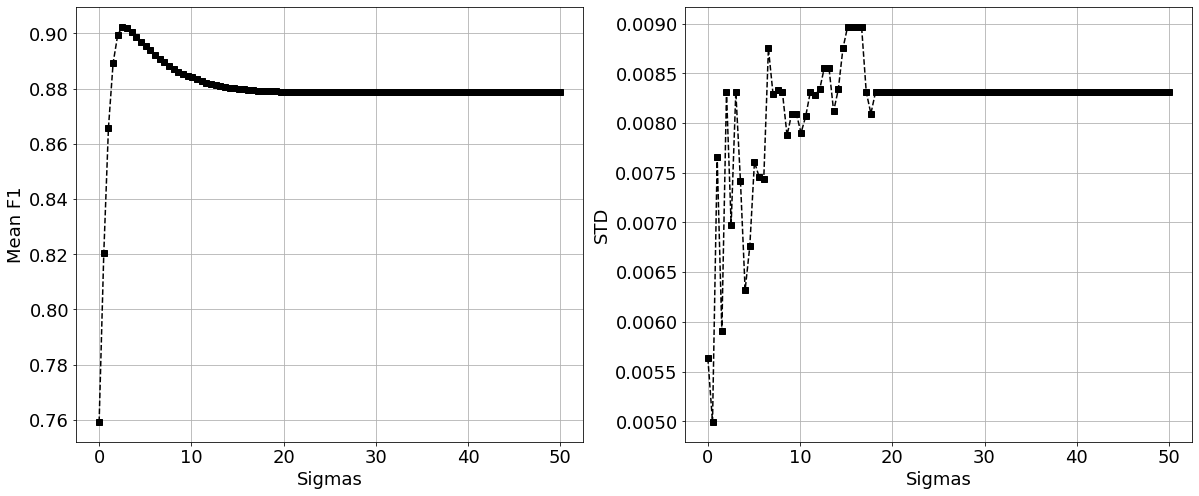

In [4]:
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(sigma, np.mean(NCLF,axis=1), '--ks')
plt.xlabel('Sigmas')
plt.ylabel('Mean F1')
plt.grid()

plt.subplot(122)
plt.plot(sigma, mad_std(NCLF,axis=1), '--ks')
plt.xlabel('Sigmas')
plt.ylabel('STD')
plt.grid()

#plt.savefig('nClf_mean.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Standartização do Dataframe

In [5]:
Y = np.array(df['Label'])  
X = df.drop(['Label'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

## MLP

In [ ]:
neurons = range(1,21,1)
MLP_1  = np.array([])
for i in neurons:
    MLP = MLPClassifier(hidden_layer_sizes=(i), solver='sgd', max_iter=2000, random_state=1, activation='relu')
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    results_MLP  = cross_validate(MLP, X=X, y=Y, cv=kfold, scoring='f1_micro')
    MLP_1 = np.concatenate((MLP_1, results_MLP['test_score']),axis=0)

#np.save('MLP_1', MLP_1.reshape(20,10))

In [ ]:
MLP_2 = np.array([])
neurons = range(1,21)
for i in neurons:
    MLP = MLPClassifier(hidden_layer_sizes=(i,i), solver='sgd', max_iter=2000, random_state=1, activation='relu')
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    results_MLP = cross_validate(MLP, X=X, y=Y, cv=kfold, scoring='f1_micro')
    MLP_2 = np.concatenate((MLP_2, results_MLP['test_score']),axis=0)

#np.save('MLP_2', MLP_2.reshape(20,10))

In [ ]:
MLP_3 = np.array([])
neurons = range(1,21)
for i in neurons:
    MLP = MLPClassifier(hidden_layer_sizes=(i,i,i), solver='sgd', max_iter=2000, random_state=1, activation='relu')
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    results_MLP = cross_validate(MLP, X=X, y=Y, cv=kfold, scoring='f1_micro')
    MLP_3 = np.concatenate((MLP_3, results_MLP['test_score']),axis=0)

#np.save('MLP_3', MLP_3.reshape(20,10))

In [6]:
MLP_1 = np.load('../data/MLP_1.npy')
MLP_2 = np.load('../data/MLP_2.npy')
MLP_3 = np.load('../data/MLP_3.npy')

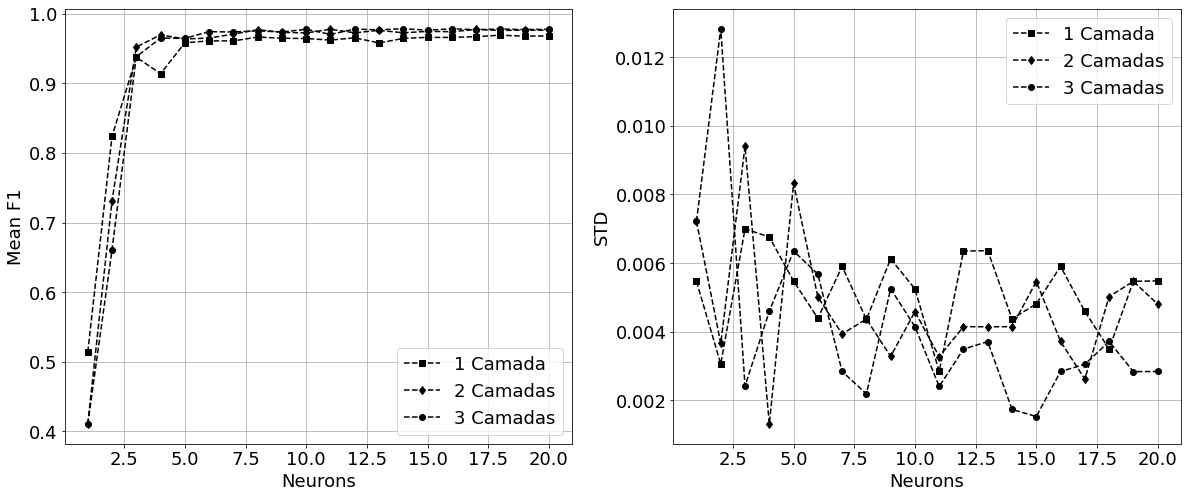

In [7]:
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(list(range(1,21)), np.mean(MLP_1,axis=1), '--ks',label='1 Camada')
plt.plot(list(range(1,21)), np.mean(MLP_2,axis=1), '--kd',label='2 Camadas')
plt.plot(list(range(1,21)), np.mean(MLP_3,axis=1), '--ko',label='3 Camadas')
plt.xlabel('Neurons')
plt.ylabel('Mean F1')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(list(range(1,21)), mad_std(MLP_1,axis=1), '--ks',label='1 Camada')
plt.plot(list(range(1,21)), mad_std(MLP_2,axis=1), '--kd',label='2 Camadas')
plt.plot(list(range(1,21)), mad_std(MLP_3,axis=1), '--ko',label='3 Camadas')

plt.xlabel('Neurons')
plt.ylabel('STD')
plt.legend()
plt.grid()

#plt.savefig('mlp_mean.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Regressão Logística

In [8]:
clf_LR = LogisticRegression(random_state=1, max_iter=500, solver='sag')
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results_LR = cross_validate(clf_LR, X=X, y=Y, cv=kfold, scoring='accuracy')

print('Acurácia:', np.mean(results_LR['test_score']))
print('STD:\t ', mad_std(results_LR['test_score']))

Acurácia: 0.8470482586817842
STD:	  0.00874949671587846


## Floresta Aleatória

In [ ]:
f1_RF = np.array([])
std_RF = np.array([])
trees = range(1,201,5)
for i in trees:
    RF = RandomForestClassifier(n_estimators=i, bootstrap=True, random_state=1)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    results_RF = cross_validate(RF, X=X, y=Y, cv=kfold, scoring='f1_micro')
    f1_RF      = np.append(f1_RF,  (results_RF['test_score'].mean()))
    std_RF     = np.append(std_RF, mad_std(results_RF['test_score']))

In [9]:
f1_RF = np.load('../data/f1_RF.npy')
std_RF = np.load('../data/std_RF.npy')

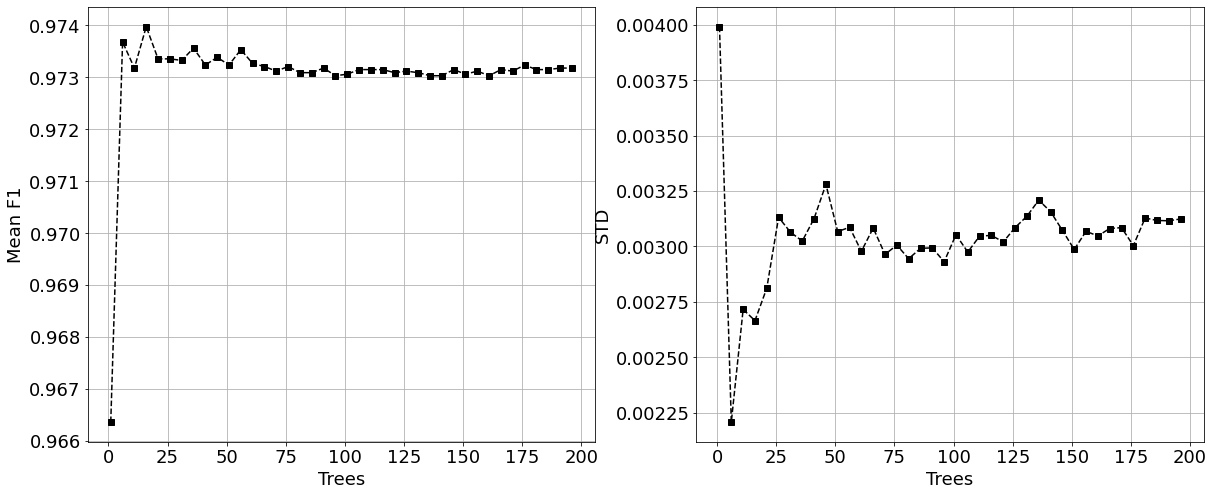

In [10]:
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(list(range(1,201,5)), f1_RF, '--ks')
plt.xlabel('Trees')
plt.ylabel('Mean F1')
plt.grid()

plt.subplot(122)
plt.plot(list(range(1,201,5)), std_RF, '--ks')
plt.xlabel('Trees')
plt.ylabel('STD')
plt.grid()

#plt.savefig('rf_mean.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()